# Support Vector Machine

The materials used in this tutorial are based on the applied exercises provided in the book <font color="orange">"An Introduction to Statistical Learning with Applications in R"</font> (ISLR). We are trying to demonstrate how to use R to train a SVM model on real-world datasets. Besides the exercises that we are going to cover in this tutorial, it is worth trying the other applied exercises given in the book by yourself.

The library for SVM is "e1071"

## Task 1

We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features. 

### (a) 
Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows: 

In [1]:
x1=runif(500)-0.5
x2=runif(500)-0.5
y=1*(x1^2-x2^2 > 0) 

### (b) 
Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y- axis. 

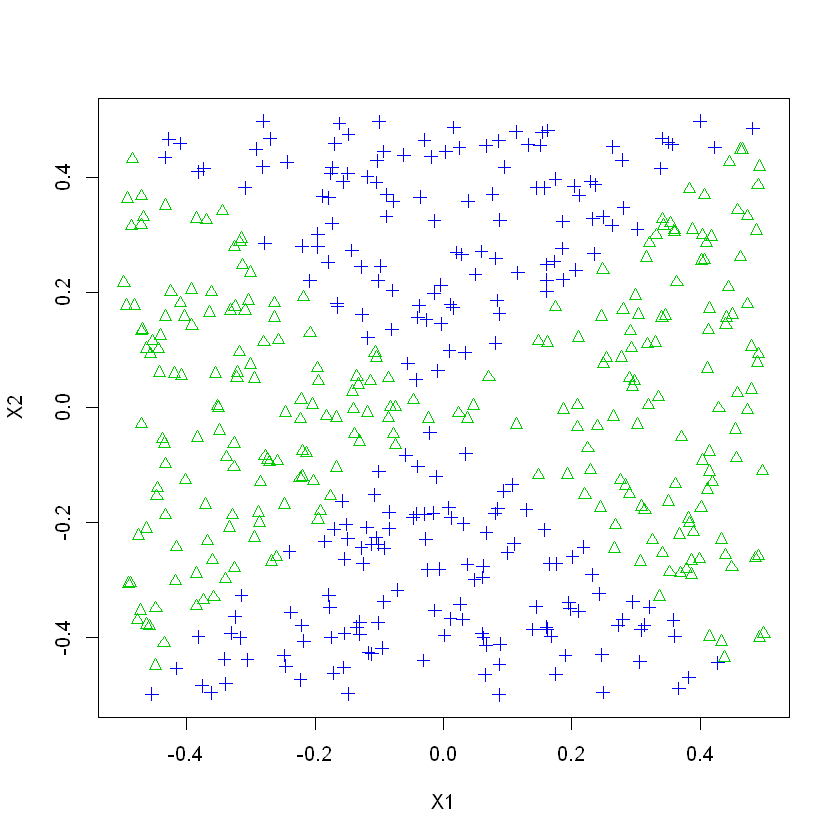

In [2]:
plot(x1, x2, xlab = "X1", ylab = "X2", col = (4 - y), pch = (3 - y))

### (c) 
Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [3]:
logit.fit <- glm(y ~ x1 + x2, family = "binomial")
summary(logit.fit)


Call:
glm(formula = y ~ x1 + x2, family = "binomial")

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.242  -1.207   1.123   1.141   1.165  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) 0.088195   0.089547   0.985    0.325
x1          0.009038   0.310251   0.029    0.977
x2          0.119715   0.316358   0.378    0.705

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 692.18  on 499  degrees of freedom
Residual deviance: 692.03  on 497  degrees of freedom
AIC: 698.03

Number of Fisher Scoring iterations: 3


The results show that both variables are insignificant for predicting y

### (d) 
* Apply this model to the training data in order to obtain a predicted class label for each training observation. 

* Plot the observations, colored according to the predicted class labels. The decision boundary should be linear. 

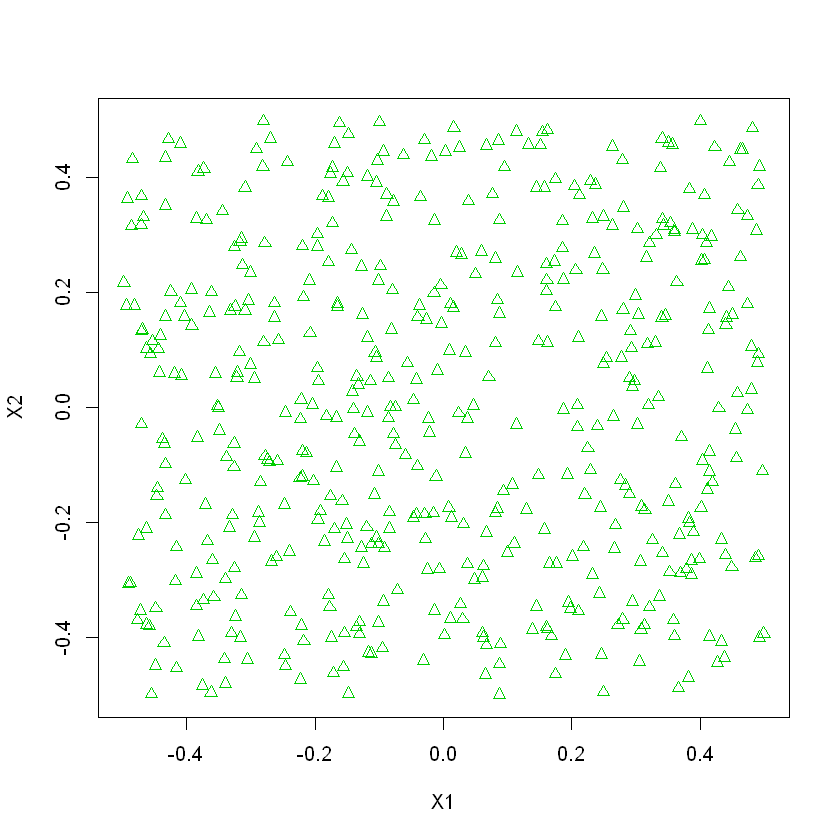

In [4]:
data <- data.frame(x1 = x1, x2 = x2, y = y)
probs <- predict(logit.fit, data, type = "response")
preds <- rep(0, 500)
preds[probs > 0.47] <- 1
plot(data[preds == 1, ]$x1, data[preds == 1, ]$x2, col = (4 - 1), pch = (3 - 1), xlab = "X1", ylab = "X2")
points(data[preds == 0, ]$x1, data[preds == 0, ]$x2, col = (4 - 0), pch = (3 - 0))

 This boundary is linear as seen in the figure.

### (e) 
Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_1^2, X_1 \times X_2, \log(X_2$), and so forth). 

In [5]:
logitnl.fit <- glm(y ~ poly(x1, 2) + poly(x2, 2) + I(x1 * x2), family = "binomial")

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [6]:
summary(logitnl.fit)


Call:
glm(formula = y ~ poly(x1, 2) + poly(x2, 2) + I(x1 * x2), family = "binomial")

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.589e-03  -2.000e-08   2.000e-08   2.000e-08   1.650e-03  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)     106.0     3690.7   0.029    0.977
poly(x1, 2)1   1981.6    62613.9   0.032    0.975
poly(x1, 2)2  37208.4   967635.3   0.038    0.969
poly(x2, 2)1  -2002.8    59677.8  -0.034    0.973
poly(x2, 2)2 -35346.0   918918.5  -0.038    0.969
I(x1 * x2)     -171.7    30566.9  -0.006    0.996

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.9218e+02  on 499  degrees of freedom
Residual deviance: 5.7528e-06  on 494  degrees of freedom
AIC: 12

Number of Fisher Scoring iterations: 25


Here again, none of the variables are statistically significants.

### (f) 
* Apply this model to the training data in order to obtain a predicted class label for each training observation. 
* Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear. 

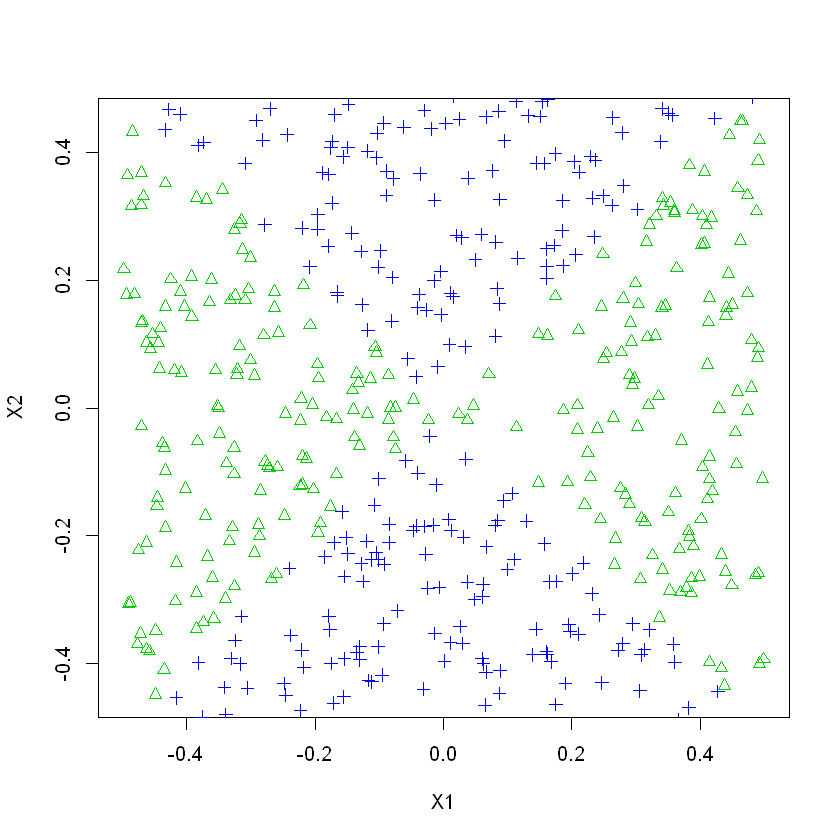

In [7]:
probs <- predict(logitnl.fit, data, type = "response")
preds <- rep(0, 500)
preds[probs > 0.47] <- 1
plot(data[preds == 1, ]$x1, data[preds == 1, ]$x2, col = (4 - 1), pch = (3 - 1), xlab = "X1", ylab = "X2")
points(data[preds == 0, ]$x1, data[preds == 0, ]$x2, col = (4 - 0), pch = (3 - 0))

The non-linear decision boundary is surprisingly very similar to the true decision boundary.

### (g) 
* Fit a support vector classifier to the data with X1 and X2 as predictors. 
* Obtain a class prediction for each training observation. 
* Plot the observations, colored according to the predicted class labels. 

In [8]:
library(e1071)
data$y <- as.factor(data$y)

In [9]:
svm.fit <- svm(y ~ x1 + x2, data, kernel = "linear", cost = 0.01)
preds <- predict(svm.fit, data)
preds

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 
  1   1   1   1   1   1   1   1  

The following plot code depends on the predict value. You might have error message 

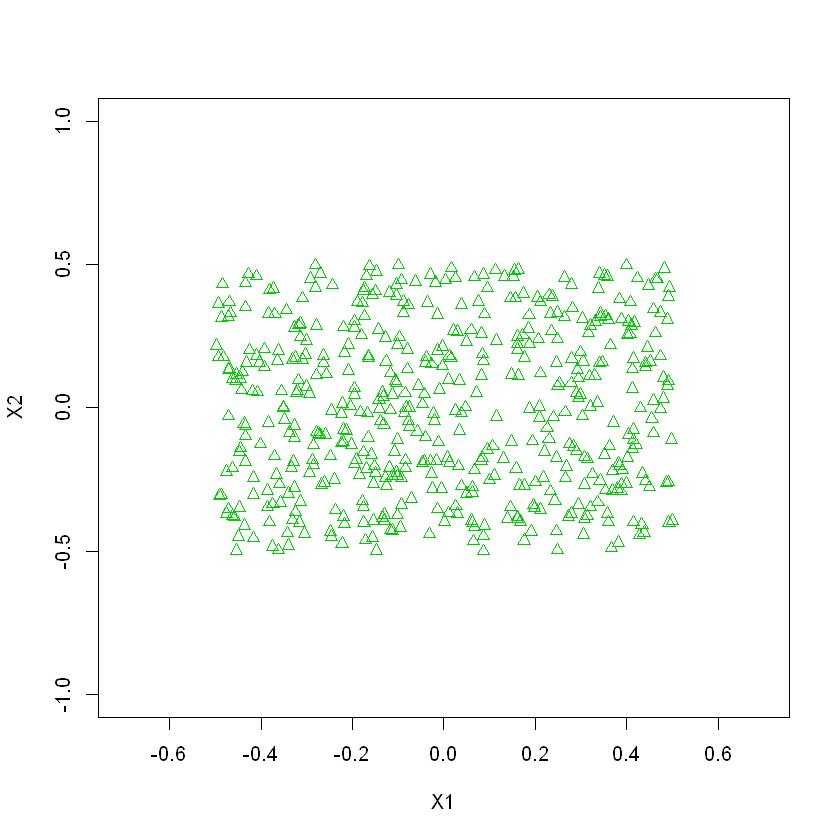

In [18]:
plot(data[preds == 0, ]$x1, data[preds == 0, ]$x2, xlim= c(-0.7,0.7), ylim = c(-1,1), col = (4 - 0), pch = (3 - 0), xlab = "X1", ylab = "X2")
points(data[preds == 1, ]$x1, data[preds == 1, ]$x2, col = (4 - 1), pch = (3 - 1))

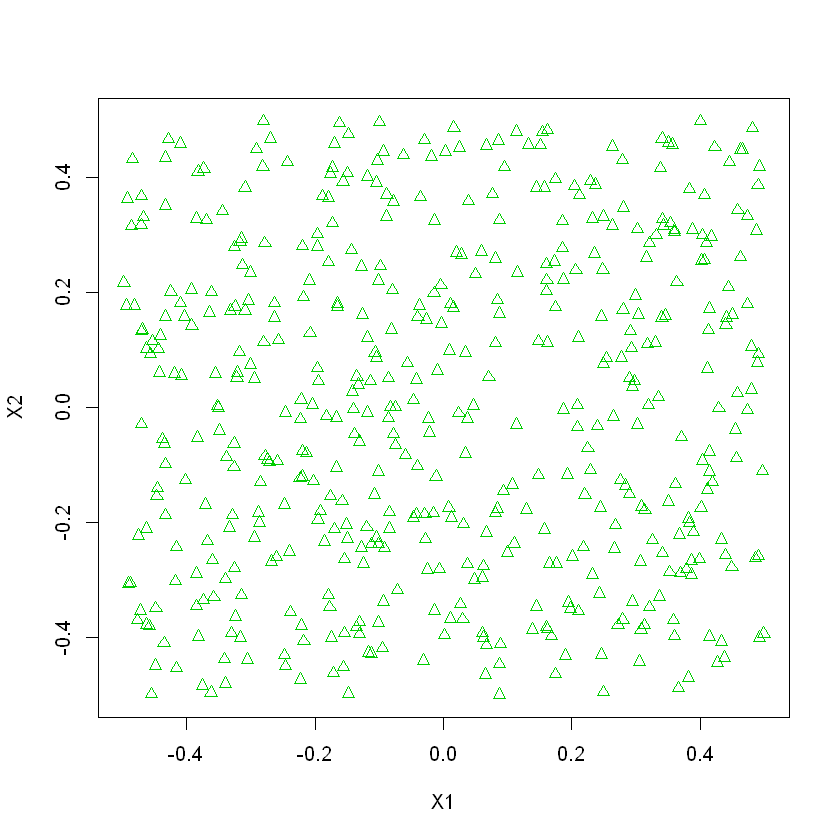

In [20]:
plot(data[preds == 1, ]$x1, data[preds == 1, ]$x2, col = (4 - 1), pch = (3 - 1), xlab = "X1", ylab = "X2")
points(data[preds == 0, ]$x1, data[preds == 0, ]$x2, col = (4 - 0), pch = (3 - 0))

This support vector classifier (even with low cost) classifies all points to a single class.

### (h) 
* Fit a SVM using a non-linear kernel to the data. 
* Obtain a class prediction for each training observation. 
* Plot the observations, colored according to the predicted class labels. 

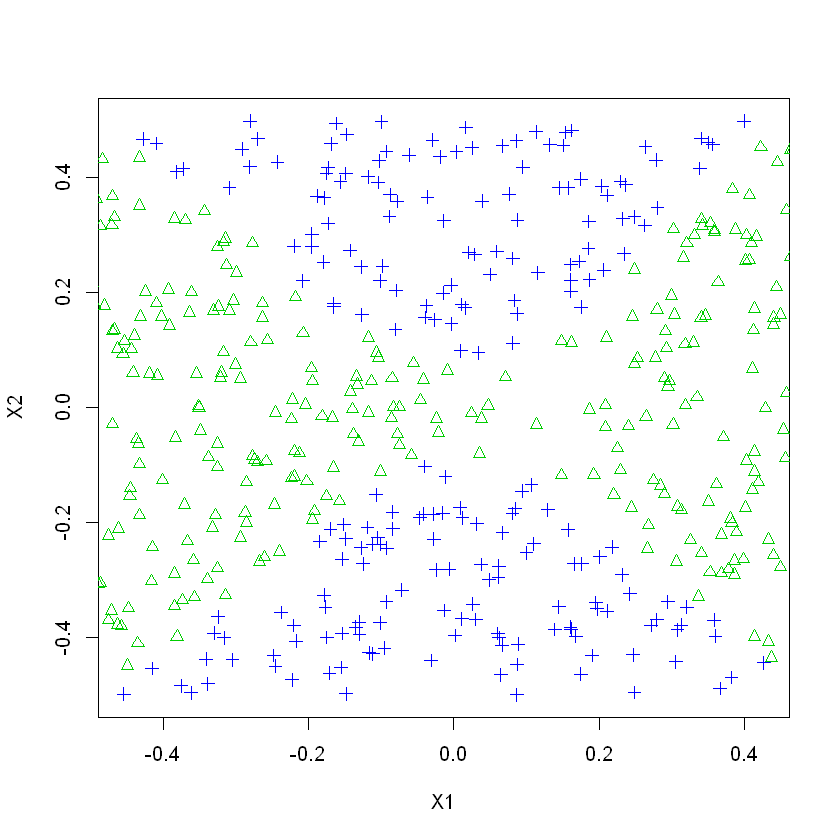

In [21]:
data$y <- as.factor(data$y)
svmnl.fit <- svm(y ~ x1 + x2, data, kernel = "radial", gamma = 1)
preds <- predict(svmnl.fit, data)
plot(data[preds == 0, ]$x1, data[preds == 0, ]$x2, col = (4 - 0), pch = (3 - 0), xlab = "X1", ylab = "X2")
points(data[preds == 1, ]$x1, data[preds == 1, ]$x2, col = (4 - 1), pch = (3 - 1))

Here again, the non-linear decision boundary is surprisingly very similar to the true decision boundary.

### (i) 
Comment on your results. 

We may conclude that SVM with non-linear kernel and logistic regression with interaction terms are equally very powerful for finding non-linear decision boundaries. Also, SVM with linear kernel and logistic regression without any interaction term are very bad when it comes to finding non-linear decision boundaries. However, one argument in favor of SVM is that it requires some manual tuning to find the right interaction terms when using logistic regression, although when using SVM we only need to tune gamma.

## Task 2 

This problem involves the OJ data set which is part of the ISLR package. 

### (a) 
Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations. 

In [22]:
library(ISLR)

set.seed(1)
train <- sample(nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

### (b) 
Fit a support vector classifier to the training data using cost=0.01, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics, and describe the results obtained. 

In [23]:
svm.linear <- svm(Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 
      gamma:  0.05555556 

Number of Support Vectors:  432

 ( 215 217 )


Number of Classes:  2 

Levels: 
 CH MM




Support vector classifier creates 432 support vectors out of 800 training points. Out of these, 217 belong to level MM and remaining 215 belong to level CH.

### (c) 
What are the training and test error rates?

In [24]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [25]:
train.pred <- predict(svm.linear, OJ.train)
confusionMatrix(table(OJ.train$Purchase, train.pred))

Confusion Matrix and Statistics

    train.pred
      CH  MM
  CH 439  55
  MM  78 228
                                          
               Accuracy : 0.8338          
                 95% CI : (0.8061, 0.8589)
    No Information Rate : 0.6462          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.643           
 Mcnemar's Test P-Value : 0.05644         
                                          
            Sensitivity : 0.8491          
            Specificity : 0.8057          
         Pos Pred Value : 0.8887          
         Neg Pred Value : 0.7451          
             Prevalence : 0.6462          
         Detection Rate : 0.5487          
   Detection Prevalence : 0.6175          
      Balanced Accuracy : 0.8274          
                                          
       'Positive' Class : CH              
                                          

In [26]:
test.pred <- predict(svm.linear, OJ.test)
confusionMatrix(table(OJ.test$Purchase, test.pred))

Confusion Matrix and Statistics

    test.pred
      CH  MM
  CH 141  18
  MM  31  80
                                          
               Accuracy : 0.8185          
                 95% CI : (0.7673, 0.8626)
    No Information Rate : 0.637           
    P-Value [Acc > NIR] : 4.999e-11       
                                          
                  Kappa : 0.6184          
 Mcnemar's Test P-Value : 0.08648         
                                          
            Sensitivity : 0.8198          
            Specificity : 0.8163          
         Pos Pred Value : 0.8868          
         Neg Pred Value : 0.7207          
             Prevalence : 0.6370          
         Detection Rate : 0.5222          
   Detection Prevalence : 0.5889          
      Balanced Accuracy : 0.8180          
                                          
       'Positive' Class : CH              
                                          

### (d) 
Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10. 

In [27]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17125 0.05172376
2   0.01778279 0.16500 0.05197489
3   0.03162278 0.16625 0.04604120
4   0.05623413 0.16500 0.04594683
5   0.10000000 0.16250 0.04787136
6   0.17782794 0.16250 0.04249183
7   0.31622777 0.16875 0.04379958
8   0.56234133 0.16625 0.03998698
9   1.00000000 0.16500 0.03670453
10  1.77827941 0.16625 0.03682259
11  3.16227766 0.16500 0.03717451
12  5.62341325 0.16500 0.03525699
13 10.00000000 0.16750 0.03917553


We may see that the optimal cost is 0.1

### (e) 
Compute the training and test error rates using this new value for cost.

In [28]:
svm.linear <- svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameter$cost)
train.pred <- predict(svm.linear, OJ.train)
t = table(OJ.train$Purchase, train.pred)
confusionMatrix(t)

Confusion Matrix and Statistics

    train.pred
      CH  MM
  CH 438  56
  MM  71 235
                                          
               Accuracy : 0.8412          
                 95% CI : (0.8141, 0.8659)
    No Information Rate : 0.6362          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6608          
 Mcnemar's Test P-Value : 0.2141          
                                          
            Sensitivity : 0.8605          
            Specificity : 0.8076          
         Pos Pred Value : 0.8866          
         Neg Pred Value : 0.7680          
             Prevalence : 0.6362          
         Detection Rate : 0.5475          
   Detection Prevalence : 0.6175          
      Balanced Accuracy : 0.8340          
                                          
       'Positive' Class : CH              
                                          

In [29]:
test.pred <- predict(svm.linear, OJ.test)
t = table(OJ.test$Purchase, test.pred)
confusionMatrix(t)

Confusion Matrix and Statistics

    test.pred
      CH  MM
  CH 140  19
  MM  32  79
                                         
               Accuracy : 0.8111         
                 95% CI : (0.7592, 0.856)
    No Information Rate : 0.637          
    P-Value [Acc > NIR] : 3.191e-10      
                                         
                  Kappa : 0.6029         
 Mcnemar's Test P-Value : 0.09289        
                                         
            Sensitivity : 0.8140         
            Specificity : 0.8061         
         Pos Pred Value : 0.8805         
         Neg Pred Value : 0.7117         
             Prevalence : 0.6370         
         Detection Rate : 0.5185         
   Detection Prevalence : 0.5889         
      Balanced Accuracy : 0.8100         
                                         
       'Positive' Class : CH             
                                         

### (f) 
Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for “gamma”.

In [30]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train)
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05555556 

Number of Support Vectors:  379

 ( 188 191 )


Number of Classes:  2 

Levels: 
 CH MM




In [31]:
train.pred <- predict(svm.radial, OJ.train)
t = table(OJ.train$Purchase, train.pred)
confusionMatrix(t)

Confusion Matrix and Statistics

    train.pred
      CH  MM
  CH 455  39
  MM  77 229
                                          
               Accuracy : 0.855           
                 95% CI : (0.8287, 0.8787)
    No Information Rate : 0.665           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6856          
 Mcnemar's Test P-Value : 0.0005918       
                                          
            Sensitivity : 0.8553          
            Specificity : 0.8545          
         Pos Pred Value : 0.9211          
         Neg Pred Value : 0.7484          
             Prevalence : 0.6650          
         Detection Rate : 0.5687          
   Detection Prevalence : 0.6175          
      Balanced Accuracy : 0.8549          
                                          
       'Positive' Class : CH              
                                          

In [32]:
test.pred <- predict(svm.radial, OJ.test)
t = table(OJ.test$Purchase, test.pred)
confusionMatrix(t)

Confusion Matrix and Statistics

    test.pred
      CH  MM
  CH 141  18
  MM  28  83
                                          
               Accuracy : 0.8296          
                 95% CI : (0.7794, 0.8725)
    No Information Rate : 0.6259          
    P-Value [Acc > NIR] : 1.955e-13       
                                          
                  Kappa : 0.6433          
 Mcnemar's Test P-Value : 0.1845          
                                          
            Sensitivity : 0.8343          
            Specificity : 0.8218          
         Pos Pred Value : 0.8868          
         Neg Pred Value : 0.7477          
             Prevalence : 0.6259          
         Detection Rate : 0.5222          
   Detection Prevalence : 0.5889          
      Balanced Accuracy : 0.8281          
                                          
       'Positive' Class : CH              
                                          

Radial kernel with default gamma creates 379 support vectors, out of which, 188 belong to level CH and remaining 191 belong to level MM. The classifier has a training error of 14.5% and a test error of 17% which is a slight improvement over linear kernel. We now use cross validation to find optimal cost.

In [33]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.16625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.38250 0.04533824
2   0.01778279 0.38250 0.04533824
3   0.03162278 0.37500 0.04894725
4   0.05623413 0.21500 0.05886661
5   0.10000000 0.17875 0.04860913
6   0.17782794 0.17875 0.05497790
7   0.31622777 0.17875 0.05981743
8   0.56234133 0.17250 0.05458174
9   1.00000000 0.16625 0.05001736
10  1.77827941 0.16875 0.05008673
11  3.16227766 0.17500 0.04787136
12  5.62341325 0.18000 0.05244044
13 10.00000000 0.18250 0.05596378


In [34]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train, cost = tune.out$best.parameter$cost)
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05555556 

Number of Support Vectors:  379

 ( 188 191 )


Number of Classes:  2 

Levels: 
 CH MM




In [35]:
train.pred <- predict(svm.radial, OJ.train)
t = table(OJ.train$Purchase, train.pred)
confusionMatrix(t)

Confusion Matrix and Statistics

    train.pred
      CH  MM
  CH 455  39
  MM  77 229
                                          
               Accuracy : 0.855           
                 95% CI : (0.8287, 0.8787)
    No Information Rate : 0.665           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6856          
 Mcnemar's Test P-Value : 0.0005918       
                                          
            Sensitivity : 0.8553          
            Specificity : 0.8545          
         Pos Pred Value : 0.9211          
         Neg Pred Value : 0.7484          
             Prevalence : 0.6650          
         Detection Rate : 0.5687          
   Detection Prevalence : 0.6175          
      Balanced Accuracy : 0.8549          
                                          
       'Positive' Class : CH              
                                          

In [36]:
test.pred <- predict(svm.radial, OJ.test)
confusionMatrix(table(OJ.test$Purchase, test.pred))

Confusion Matrix and Statistics

    test.pred
      CH  MM
  CH 141  18
  MM  28  83
                                          
               Accuracy : 0.8296          
                 95% CI : (0.7794, 0.8725)
    No Information Rate : 0.6259          
    P-Value [Acc > NIR] : 1.955e-13       
                                          
                  Kappa : 0.6433          
 Mcnemar's Test P-Value : 0.1845          
                                          
            Sensitivity : 0.8343          
            Specificity : 0.8218          
         Pos Pred Value : 0.8868          
         Neg Pred Value : 0.7477          
             Prevalence : 0.6259          
         Detection Rate : 0.5222          
   Detection Prevalence : 0.5889          
      Balanced Accuracy : 0.8281          
                                          
       'Positive' Class : CH              
                                          

### (g) 
Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree=2. 

In [37]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", data = OJ.train, degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
      gamma:  0.05555556 
     coef.0:  0 

Number of Support Vectors:  454

 ( 224 230 )


Number of Classes:  2 

Levels: 
 CH MM




In [38]:
train.pred <- predict(svm.poly, OJ.train)
confusionMatrix(table(OJ.train$Purchase, train.pred))

Confusion Matrix and Statistics

    train.pred
      CH  MM
  CH 461  33
  MM 105 201
                                          
               Accuracy : 0.8275          
                 95% CI : (0.7995, 0.8531)
    No Information Rate : 0.7075          
    P-Value [Acc > NIR] : 3.000e-15       
                                          
                  Kappa : 0.6177          
 Mcnemar's Test P-Value : 1.504e-09       
                                          
            Sensitivity : 0.8145          
            Specificity : 0.8590          
         Pos Pred Value : 0.9332          
         Neg Pred Value : 0.6569          
             Prevalence : 0.7075          
         Detection Rate : 0.5763          
   Detection Prevalence : 0.6175          
      Balanced Accuracy : 0.8367          
                                          
       'Positive' Class : CH              
                                          

In [39]:
test.pred <- predict(svm.poly, OJ.test)
confusionMatrix(table(OJ.test$Purchase, test.pred))

Confusion Matrix and Statistics

    test.pred
      CH  MM
  CH 149  10
  MM  41  70
                                         
               Accuracy : 0.8111         
                 95% CI : (0.7592, 0.856)
    No Information Rate : 0.7037         
    P-Value [Acc > NIR] : 3.862e-05      
                                         
                  Kappa : 0.5927         
 Mcnemar's Test P-Value : 2.659e-05      
                                         
            Sensitivity : 0.7842         
            Specificity : 0.8750         
         Pos Pred Value : 0.9371         
         Neg Pred Value : 0.6306         
             Prevalence : 0.7037         
         Detection Rate : 0.5519         
   Detection Prevalence : 0.5889         
      Balanced Accuracy : 0.8296         
                                         
       'Positive' Class : CH             
                                         

Polynomial kernel with default gamma creates 454 support vectors, out of which, 224 belong to level CH and remaining 230 belong to level MM. The classifier has a training error of 17.2% and a test error of 18.8% which is no improvement over linear kernel. We now use cross validation to find optimal cost.

In [40]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "polynomial", degree = 2, ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.18125 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.38250 0.04533824
2   0.01778279 0.36750 0.04972145
3   0.03162278 0.36500 0.05458174
4   0.05623413 0.33375 0.05070681
5   0.10000000 0.32500 0.04677072
6   0.17782794 0.25875 0.05952649
7   0.31622777 0.21250 0.06123724
8   0.56234133 0.21250 0.05743354
9   1.00000000 0.19750 0.06687468
10  1.77827941 0.19375 0.05376453
11  3.16227766 0.19625 0.05653477
12  5.62341325 0.18375 0.05434266
13 10.00000000 0.18125 0.05245699


In [41]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", degree = 2, data = OJ.train, cost = tune.out$best.parameter$cost)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2, cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  2 
      gamma:  0.05555556 
     coef.0:  0 

Number of Support Vectors:  342

 ( 170 172 )


Number of Classes:  2 

Levels: 
 CH MM




In [42]:
train.pred <- predict(svm.poly, OJ.train)
confusionMatrix(table(OJ.train$Purchase, train.pred))

Confusion Matrix and Statistics

    train.pred
      CH  MM
  CH 450  44
  MM  72 234
                                          
               Accuracy : 0.855           
                 95% CI : (0.8287, 0.8787)
    No Information Rate : 0.6525          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6876          
 Mcnemar's Test P-Value : 0.01218         
                                          
            Sensitivity : 0.8621          
            Specificity : 0.8417          
         Pos Pred Value : 0.9109          
         Neg Pred Value : 0.7647          
             Prevalence : 0.6525          
         Detection Rate : 0.5625          
   Detection Prevalence : 0.6175          
      Balanced Accuracy : 0.8519          
                                          
       'Positive' Class : CH              
                                          

In [43]:
test.pred <- predict(svm.poly, OJ.test)
confusionMatrix(table(OJ.test$Purchase, test.pred))

Confusion Matrix and Statistics

    test.pred
      CH  MM
  CH 140  19
  MM  31  80
                                          
               Accuracy : 0.8148          
                 95% CI : (0.7633, 0.8593)
    No Information Rate : 0.6333          
    P-Value [Acc > NIR] : 5.83e-11        
                                          
                  Kappa : 0.6112          
 Mcnemar's Test P-Value : 0.1198          
                                          
            Sensitivity : 0.8187          
            Specificity : 0.8081          
         Pos Pred Value : 0.8805          
         Neg Pred Value : 0.7207          
             Prevalence : 0.6333          
         Detection Rate : 0.5185          
   Detection Prevalence : 0.5889          
      Balanced Accuracy : 0.8134          
                                          
       'Positive' Class : CH              
                                          

Tuning reduce train and test error rates.

Overall, which approach seems to give the best results on this data ?

Overall, radial basis kernel seems to be producing minimum misclassification error on both train and test data.